**Q1(a)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return 1 / (1 + 25 * t**2)

def plot_sampled_function(M):
    # Generate M+1 equally spaced points in the interval [-1, 1]
    t_values = np.linspace(-1, 1, M+1)

    # Calculate the corresponding function values
    f_values = f(t_values)

    # Create a fine-grained t range for a smooth curve
    t_smooth = np.linspace(-1, 1, 1000)
    f_smooth = f(t_smooth)

    # Plot the sampled points and the smooth curve
    plt.figure(figsize=(10, 6))
    plt.plot(t_smooth, f_smooth, label='f(t)')
    plt.scatter(t_values, f_values, c='red', marker='o', label='Sampled Points')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Sampling of f(t) on [-1, 1]')
    plt.legend()
    plt.grid(True)
    plt.show()

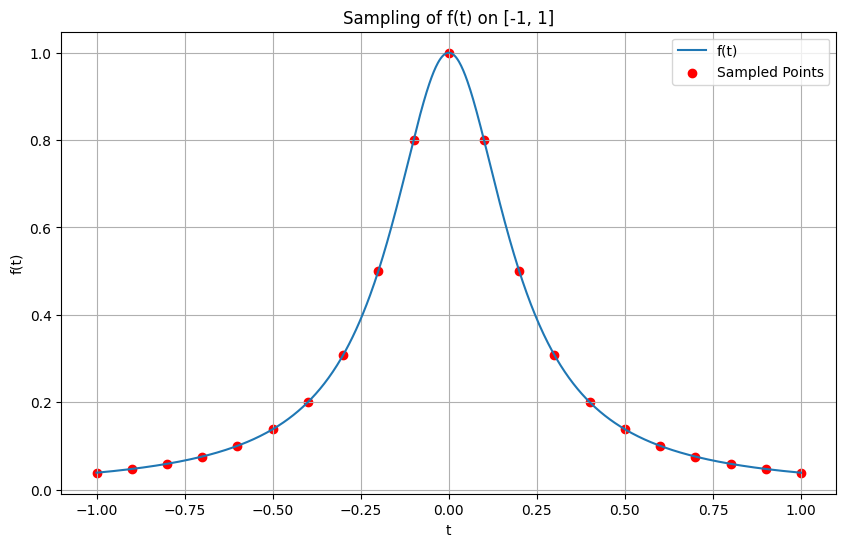

In [ ]:
# Define the number of equally spaced samples (M)
M = 20  # You can change this value to get different numbers of samples
plot_sampled_function(M)

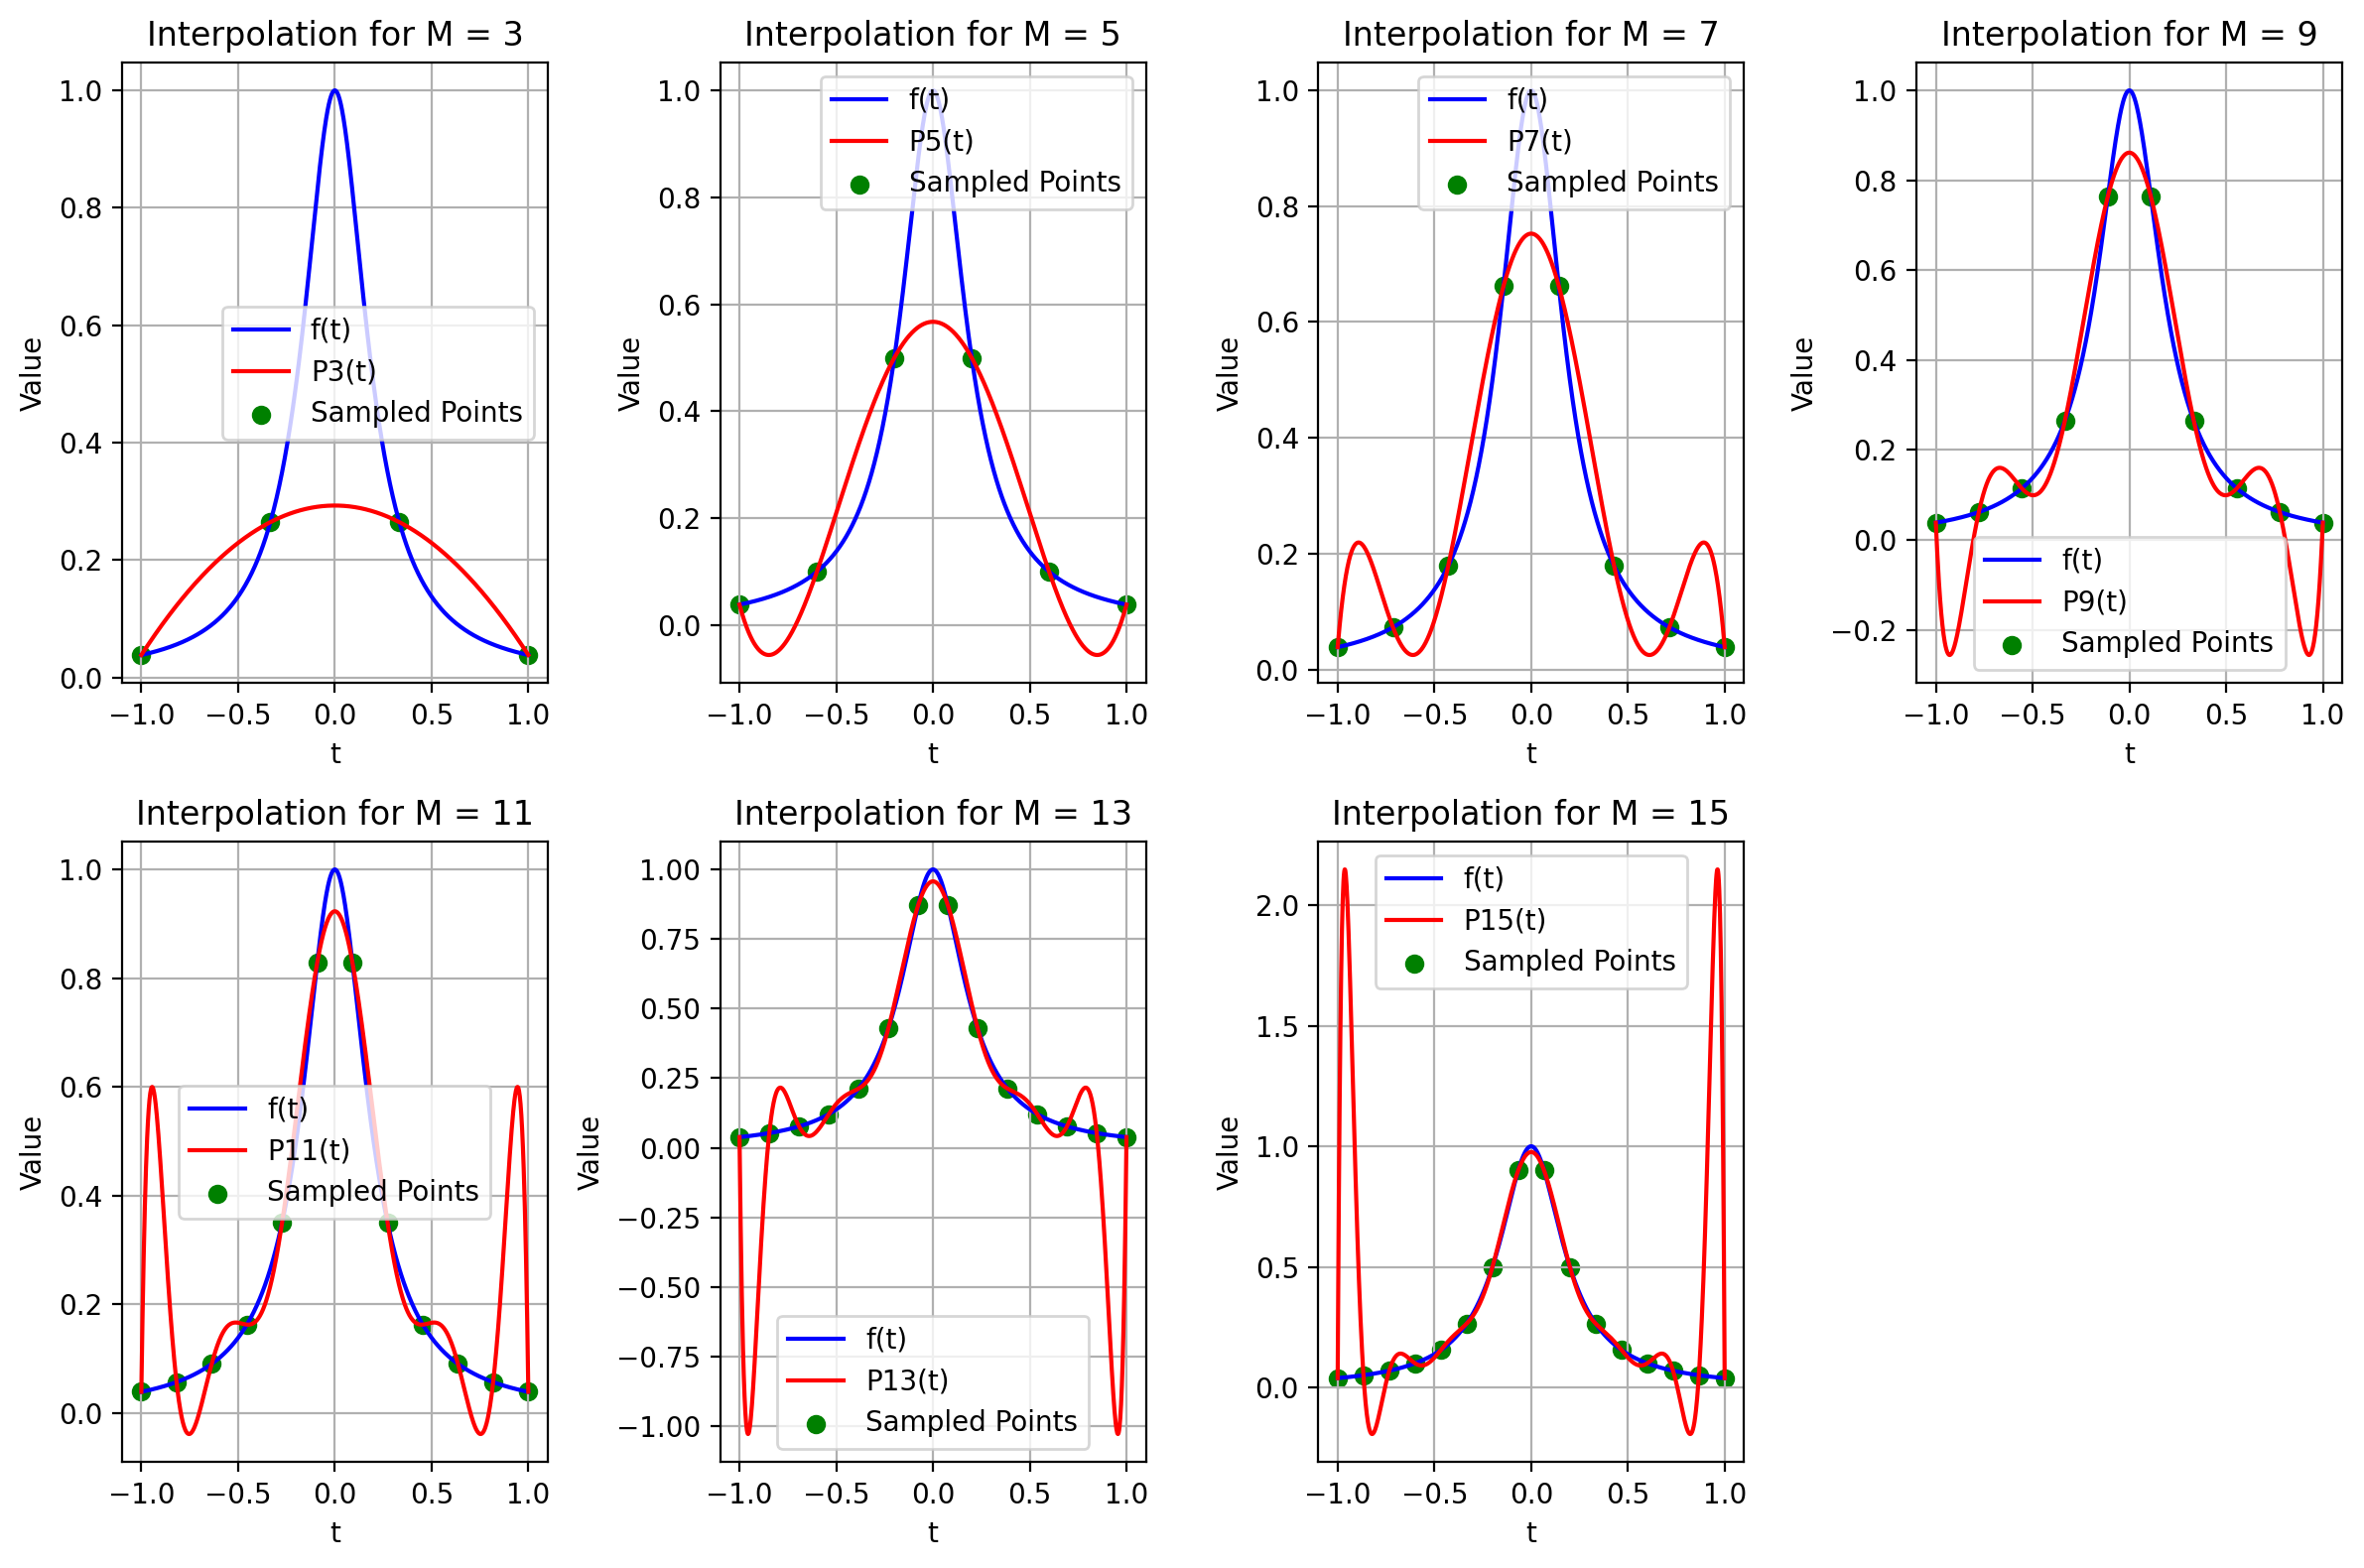

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function f(t)
def f(t):
    return 1 / (1 + 25 * t**2)

# Generate equally spaced sample points for t
M_values = [3, 5, 7, 9, 11, 13, 15]
t_values = np.linspace(-1, 1, 1000)  # Fine-grained t values for plotting

# Create a figure to display all the plots
plt.figure(figsize=(12, 8), dpi=200)
# Create the 3D plot

# Loop over different values of M
for M in M_values:
    # Generate M+1 equally spaced sample points
    t_sampled = np.linspace(-1, 1, M+1)
    f_sampled = f(t_sampled)

    # Perform polynomial interpolation
    coefficients = np.polyfit(t_sampled, f_sampled, M)
    polynomial = np.poly1d(coefficients)

    # Evaluate the polynomial at fine-grained t values for plotting
    f_interpolated = polynomial(t_values)

    # Plot the original function and the interpolated polynomial
    plt.subplot(2, 4, M_values.index(M) + 1)
    plt.plot(t_values, f(t_values), label='f(t)', color= 'blue')
    plt.plot(t_values, f_interpolated, label=f'P{M}(t)', color = 'red')
    plt.scatter(t_sampled, f_sampled, c='green', marker='o', label='Sampled Points')
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.title(f'Interpolation for M = {M}')
    plt.legend()
    plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


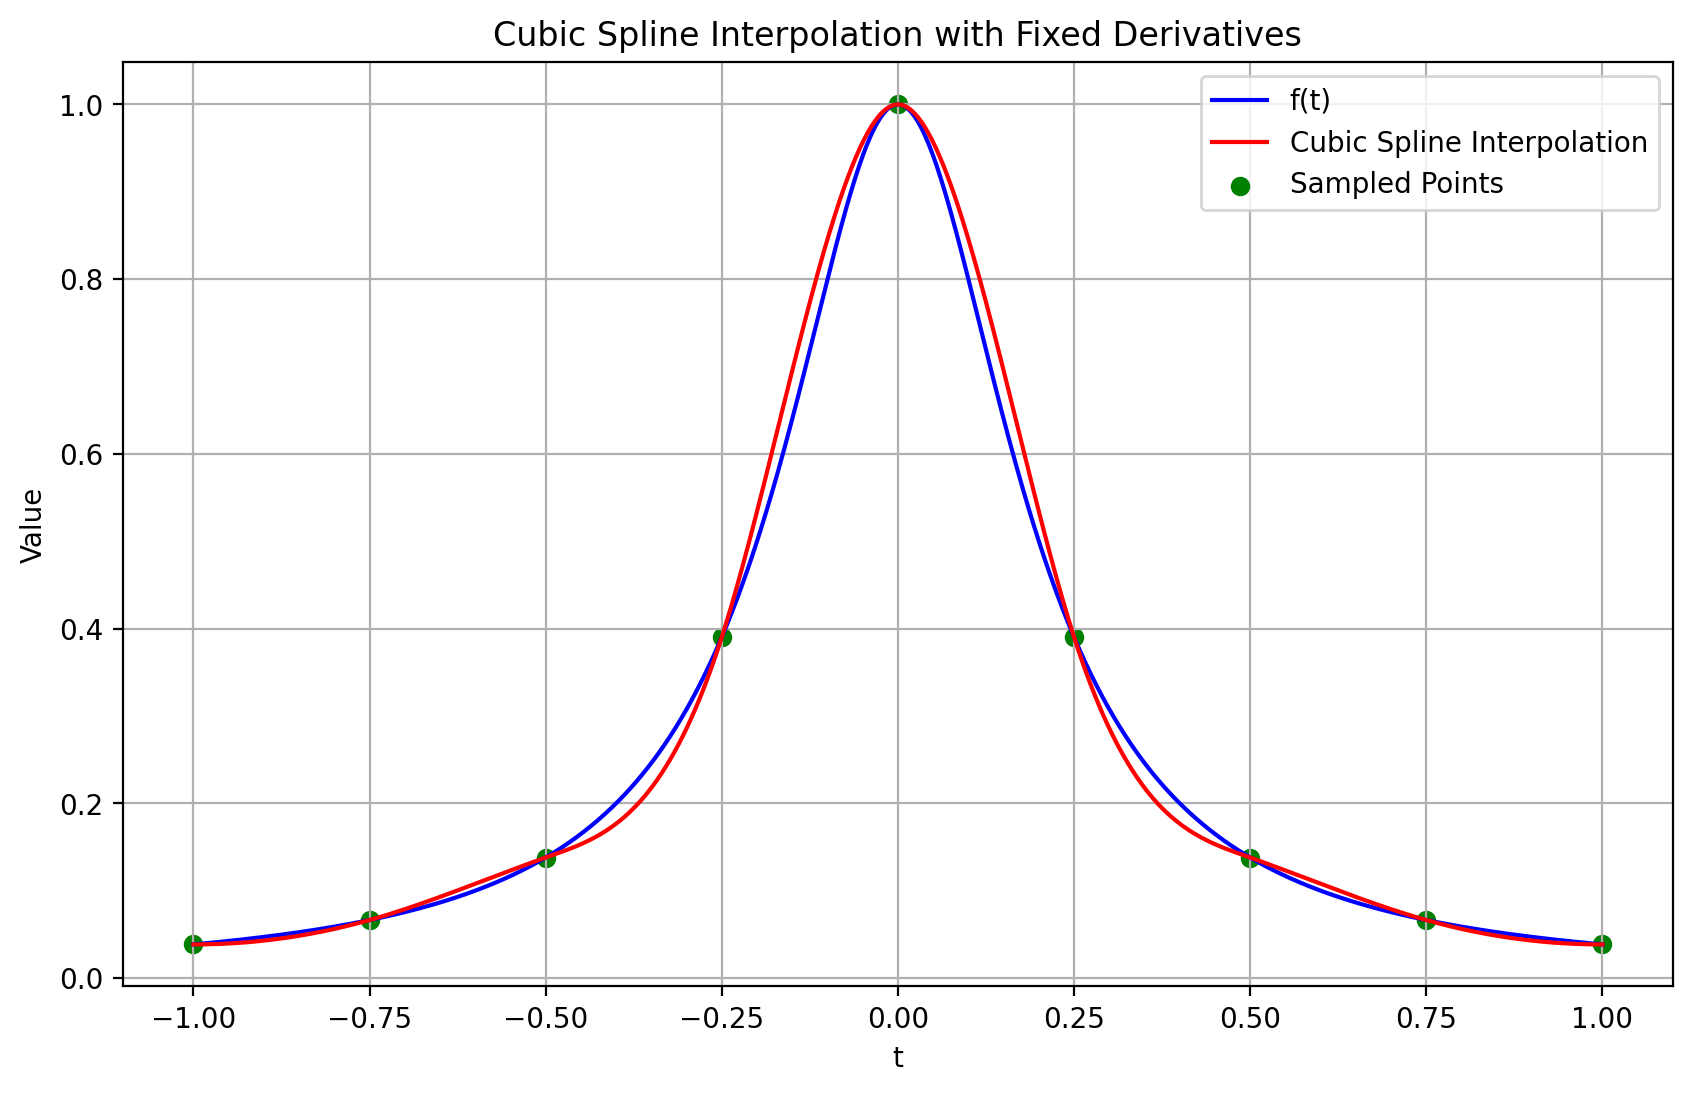

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the original function f(t)
def f(t):
    return 1 / (1 + 25 * t**2)

# Generate 9 equally spaced sample points in the interval [-1, 1]
M = 8  # M+1 = 9 equally spaced points
t_sampled = np.linspace(-1, 1, M+1)
f_sampled = f(t_sampled)

# Set up the cubic spline interpolation with fixed derivatives at endpoints
cs = CubicSpline(t_sampled, f_sampled, bc_type='clamped')

# Generate fine-grained t values for plotting
t_values = np.linspace(-1, 1, 1000)

# Evaluate the cubic spline at fine-grained t values for plotting
f_interpolated = cs(t_values)

# Plot the original function and the cubic spline interpolation
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(t_values, f(t_values), label='f(t)',color='blue')
plt.plot(t_values, f_interpolated, label='Cubic Spline Interpolation',color = 'red')
plt.scatter(t_sampled, f_sampled, c='green', marker='o', label='Sampled Points')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Cubic Spline Interpolation with Fixed Derivatives')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


....

**Q1(b)**

In [ ]:
import numpy as np

# Given data
t = np.linspace(-1, 1, 9)
f_t = [1 / (1 + 25 * t_i**2) for t_i in t]

# Number of intervals
n = len(t)-2
n_eq = (n+1)*4

# Initialize coefficient matrix A and right-hand side vector b
A = np.zeros((n_eq, n_eq))
b = np.zeros(n_eq)

print(n)

# Loop to create equations
for i in range(n):

    # value at i
    for j in range(4):
      A[2*i, 4*i+j] = t[i+1]**(3 - j)
      A[2*i+1, 4*i+(j+4)] = t[i+1]**(3 - j)
    b[2*i] = f_t[i+1]
    b[2*i+1] = f_t[i+1]

    # continutity of first derivative i
    # 4 ->
    for j in range(3):
        A[2*n+i, 4*i+j] = (3 - j) * t[i+1]**(2 - j)
        A[2*n+i, 4*i+(j+4)] = -(3 - j) * t[i+1]**(2 - j)
    b[2*n+2*i] = 0

    # Continuity of second derivatives at t_i+1
    # 6 ->
    for j in range(2):
        A[3*n + i, 4*i+j] = (6 - j*4) * t[i+1]**(1 - j)
        A[3*n + i, 4*i +(j+ 4)] = -(6 - j*4) * t[i+1]**(1 - j)

    #print(i)
    #print('this one',3*n + 2*i)
    #b[3*n + 2*i] = 0


# end points value
for j in range(4):
  A[4*n,j] = t[0]**(3 - j)
  A[4*n+1,4*n+(j)] = t[-1]**(3 - j)
  print('check',A[4*n+1,4*n+(j)])
b[4*n] = f_t[0]
b[4*n+1] = f_t[-1]

# end points derivatives
for j in range(3):
  A[4*n+2,j] = (3 - j) * t[0]**(2 - j)
  A[4*n+3,4*n+(j)] = (3 - j) * t[-1]**(2 - j)
b[4*n+2] = 0
b[4*n+3] = 0

print(A)
print(b)

print(A.shape)
print(n)


# Solve the linear system
coefficients = np.linalg.solve(A, b)

print('coefficients',coefficients)

def break_array_into_p_pieces(arr,p):
    n = len(arr) // p  # Calculate the length of each piece
    pieces = [arr[i:i+n] for i in range(0, len(arr), n)]  # Use list comprehension to create the pieces
    return pieces

pieces = break_array_into_p_pieces(coefficients,n+1)
print('pieces',pieces)

for i in range(len(pieces)):
  print("Spline {}  coefficients:".format(i))
  print(f"a0 = {pieces[i][0]}, b0 = {pieces[i][1]}, c0 = {pieces[i][2]}, d0 = {pieces[i][3]}")


7
check 1.0
check 1.0
check 1.0
check 1.0
[[-0.421875  0.5625   -0.75     ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  1.        1.        1.      ]
 [ 3.       -2.        1.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  2.        1.        0.      ]]
[0.06639004 0.06639004 0.13793103 0.13793103 0.3902439  0.3902439
 1.         1.         0.3902439  0.3902439  0.13793103 0.13793103
 0.06639004 0.06639004 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03846154 0.03846154
 0.         0.        ]
(32, 32)
7
coefficients [ 5.49663389e-02  5.98013481e-01  1.03112794e+00  5.26542341e-01
 -9.48548048e-01 -1.65989389e+00 -6.62302583e-01  1.03184709e-01
  1.25174265e+01  1.85390679e+01  9.43717832e+00  1.78

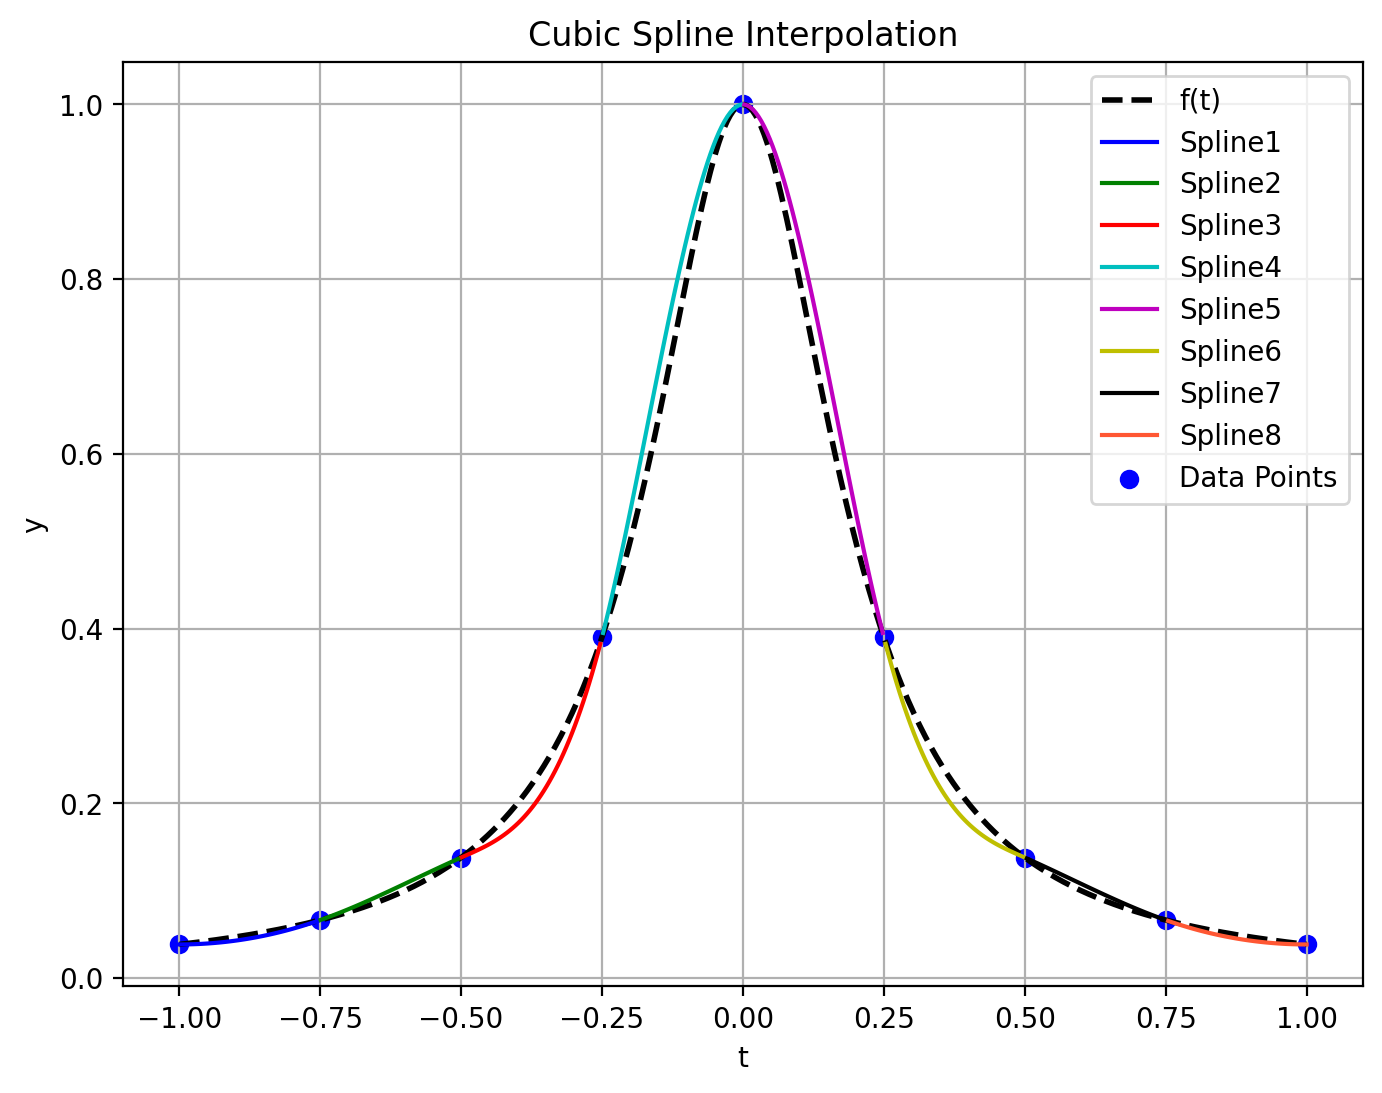

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Given data
t = np.linspace(-1, 1, 9)
f_t = [1 / (1 + 25 * t_i**2) for t_i in t]

# Define functions for f(t) and the cubic splines
def f(t):
    return 1 / (1 + 25 * t**2)

def spline(t,coeff):
    return coeff[0] * t**3 + coeff[1] * t**2 + coeff[2] * t + coeff[3]


# Create a range of t values for plotting
t_values = np.linspace(-1, 1, 400)  # Adjust the number of points as needed

# Calculate the indices for splitting
n = len(t)-1

# Calculate the indices for splitting into n equal parts
split_indices = np.linspace(0, len(t_values), n + 1, dtype=int)

piece = []
# Split the array into three equal pieces
for i in range(len(t)-1):
  piece.append(t_values[split_indices[i]:split_indices[i+1]])

# Evaluate the functions at the t_values
f_values = f(t_values)

spl = []
# Split the array into three equal pieces
for i in range(len(t)-1):
  spl.append(spline(piece[i],pieces[i]))

# Create a figure and plot the functions
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(t_values, f_values, label='f(t)', linestyle='--', linewidth=2, color='black')

# Define a list of colors to cycle through
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#3366FF', '#99FF33']


for i in range(len(t)-1):
  plt.plot(piece[i], spl[i], label='Spline{}'.format(i+1), linestyle='-', color=colors[i])

# Plot data points used for interpolation
plt.scatter(t, f_t, color='blue', marker='o', label='Data Points')

# Add labels and legend
plt.xlabel('t')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
